<a href="https://colab.research.google.com/github/lgetnt/Python_study/blob/main/Prophet_%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet 

In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.metrics import r2_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_excel('/content/drive/MyDrive/Project/Data/LCD 분석_통합 data_210818.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                147 non-null    datetime64[ns]
 1   month               147 non-null    object        
 2   Quarter             147 non-null    object        
 3   Price_32H           101 non-null    float64       
 4   Price_43F           82 non-null     float64       
 5   Price_50U           91 non-null     float64       
 6   Price_55U           91 non-null     float64       
 7   Price_65U           91 non-null     float64       
 8   Shipment_32         138 non-null    float64       
 9   Shipment_43         138 non-null    float64       
 10  Shipment_50         138 non-null    float64       
 11  Shipment_55         138 non-null    float64       
 12  Shipment_65         138 non-null    float64       
 13  Shipment_TTL        138 non-null    float64       

In [7]:
df32S= df[['date','Price_32H']]
df32S.columns = ["ds", "y"]
df32S=df32S.dropna()
df32S

,ds,y
41,2013-06-01,101.0
42,2013-07-01,92.0
43,2013-08-01,88.0
44,2013-09-01,86.0
45,2013-10-01,83.0
...,...,...
137,2021-06-01,87.0
138,2021-07-01,87.0
139,2021-08-01,85.0
140,2021-09-01,83.0


In [8]:
df32S.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 41 to 141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      101 non-null    datetime64[ns]
 1   y       101 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


- 예측하고 싶은 미래 날짜를 자동으로 생성
- 기간을 인자로 입력

In [9]:
m32 = Prophet()
m32.fit(df32S)
# forecast = m.predict(future_test)
# m43 = Prophet()
# m43.fit(df43S)

# m50 = Prophet()
# m50.fit(df50S)

# m55 = Prophet()
# m55.fit(df55S)

# m65 = Prophet()
# m65.fit(df65S)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# 향 후 1년 예측
future32 = m32.make_future_dataframe(periods=12, freq='MS')
print(future32.shape)
forecast32 = m32.predict(future32)
print(forecast32.shape)

#future43 = m43.make_future_dataframe(periods=12, freq='MS')
#print(future43.shape)
#forecast43 = m43.predict(future43)
#print(forecast43.shape)

#future50 = m50.make_future_dataframe(periods=12, freq='MS')
#print(future50.shape)
#forecast50 = m50.predict(future50)
#print(forecast50.shape)

#future55 = m55.make_future_dataframe(periods=12, freq='MS')
#print(future55.shape)
#forecast55 = m55.predict(future55)
#print(forecast55.shape)

#future65 = m65.make_future_dataframe(periods=12, freq='MS')
#print(future65.shape)
#forecast65 = m65.predict(future65)
#print(forecast65.shape)

(113, 1)
(113, 16)


In [11]:
forecast32.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
108,2022-06-01,46.358956,26.891369,67.887404,46.306443,46.414699,1.379799,1.379799,1.379799,1.379799,1.379799,1.379799,0.0,0.0,0.0,47.738755
109,2022-07-01,46.128398,26.585802,66.920635,46.063128,46.195554,0.339284,0.339284,0.339284,0.339284,0.339284,0.339284,0.0,0.0,0.0,46.467681
110,2022-08-01,45.890155,25.965356,67.338157,45.813773,45.971274,0.602992,0.602992,0.602992,0.602992,0.602992,0.602992,0.0,0.0,0.0,46.493147
111,2022-09-01,45.651912,27.616871,67.489046,45.562227,45.746394,2.408624,2.408624,2.408624,2.408624,2.408624,2.408624,0.0,0.0,0.0,48.060536
112,2022-10-01,45.421354,26.770458,67.982836,45.315264,45.530820,1.788688,1.788688,1.788688,1.788688,1.788688,1.788688,0.0,0.0,0.0,47.210041


- 예측은 predict 함수로 수행
- future에 있는 모든 날짜의 예측치를 추정하여 yhat 컬럼에 담는다
- 결과 forecast 객체에는 이외에도 여러가지 값들이 저장된다 (최대, 최소 범위 등)

### 결과 그래프
- Prophet.plot 함수 사용

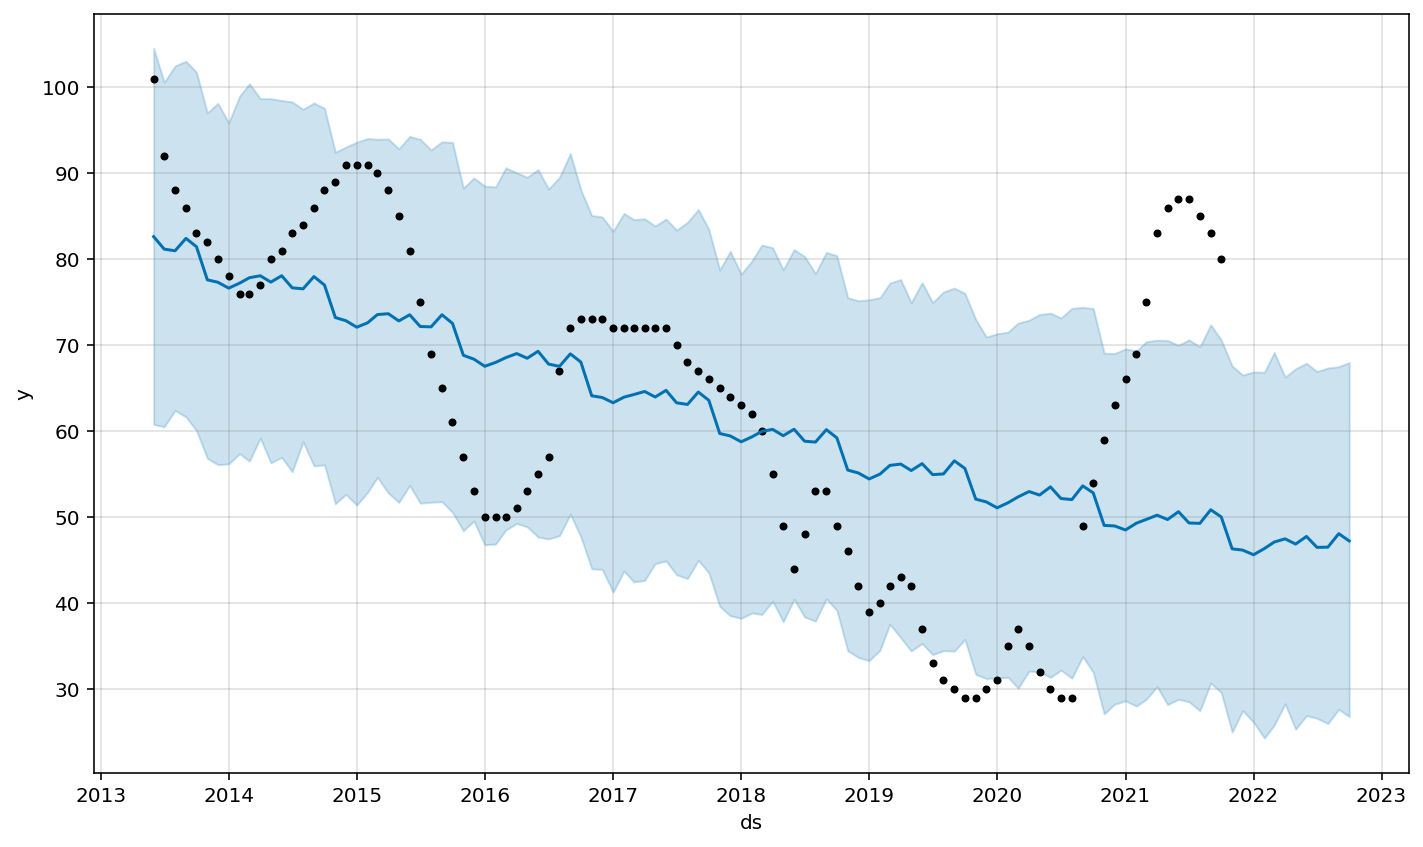

In [12]:
fig1 = m32.plot(forecast32)
from datetime import datetime
import matplotlib.pyplot as plt
# plt.xlim([datetime(2015, 8, 1), datetime(2016, 5, 1)])
plt.show()

In [ ]:
# 과제: 과거 1년간 데이터 (예:2015년)를 그 이전의 데이터로 예측하는 모델을 만든다. 예: train_df = df[:-365], test_df = df[-365:]
# predict()를 수행할 때는 예측할 기간(future) 데이터프레임의 y 값 컬럼은 삭제해야 한다 (예측하고 싶은 날짜 정보만 주어야 한다)
# 지난 1년치 예측의 r2_score(y_test, y_pred)를 구해보자. (MAE?) - show_regression_result() 이용

In [13]:
train_df = df32S[:-12]
test_df = df32S[-12:]

In [14]:
full_range = df32S.copy()
full_range = full_range.drop(["y"], axis=1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


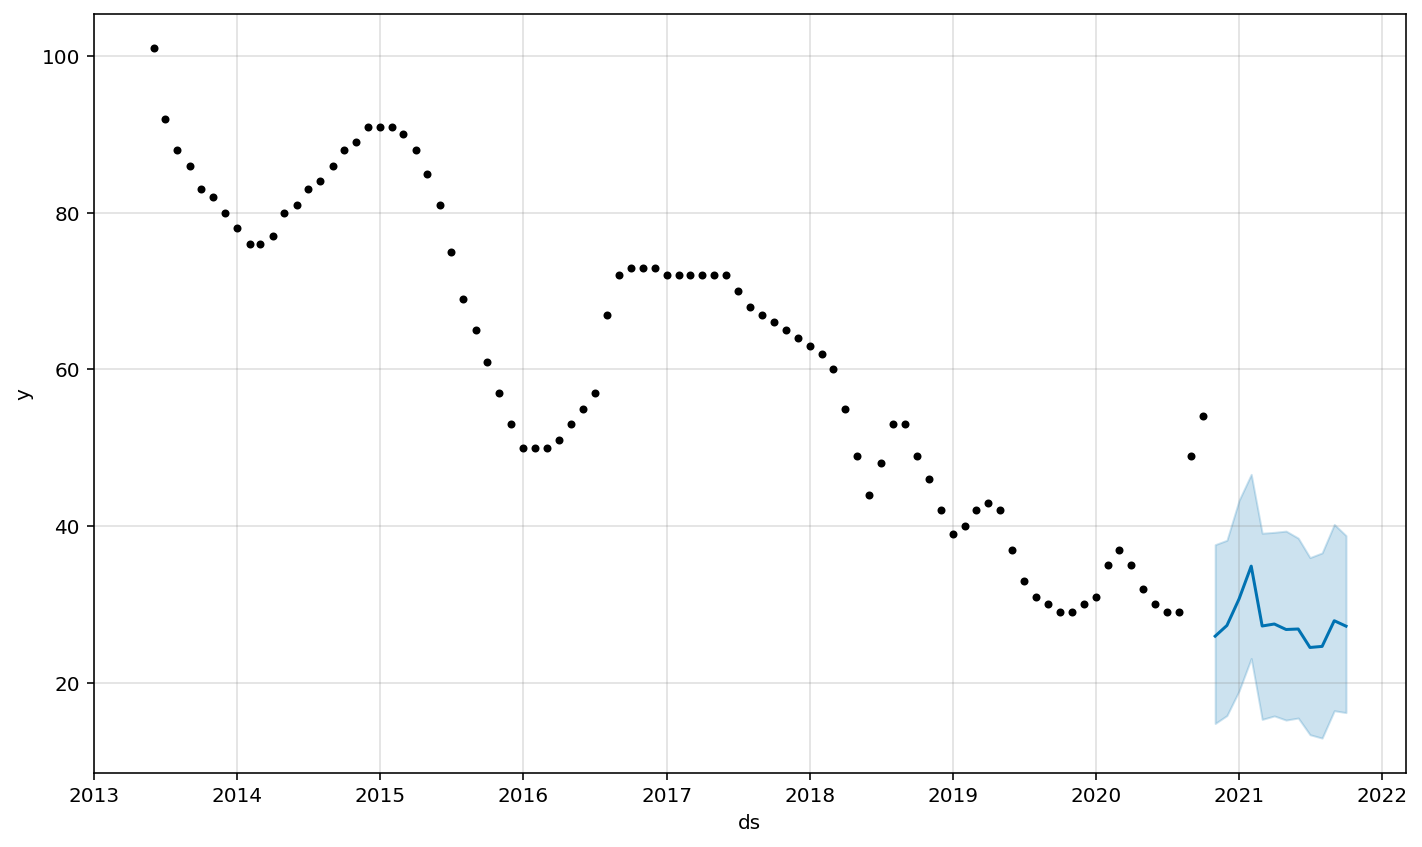

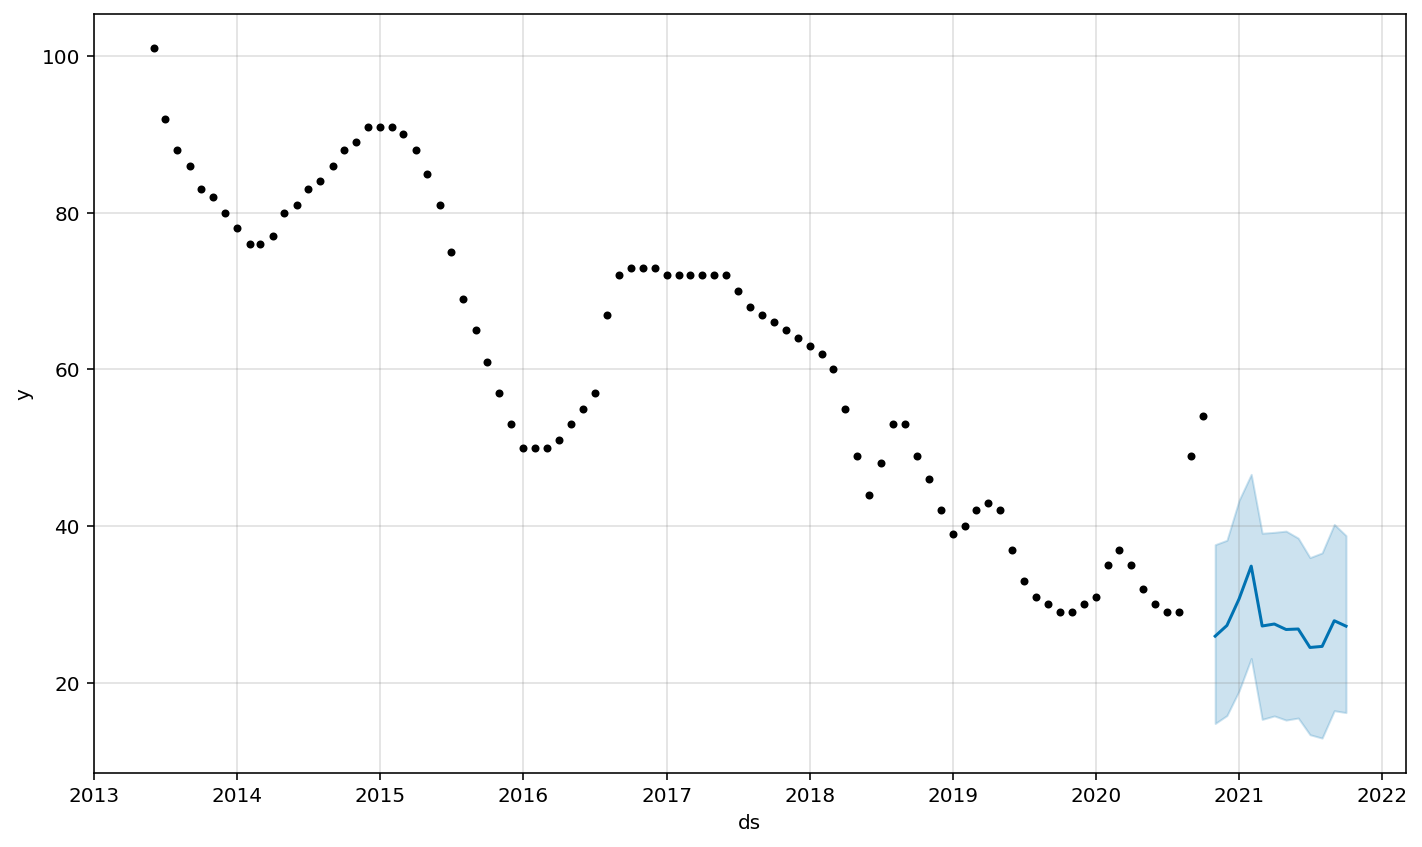

In [15]:
future_test = test_df.drop(["y"], axis=1) # 최근 1년치만 예측 관찰

m= Prophet()
m.fit(train_df)
forecast = m.predict(future_test)
# print(forecast.shape)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast)

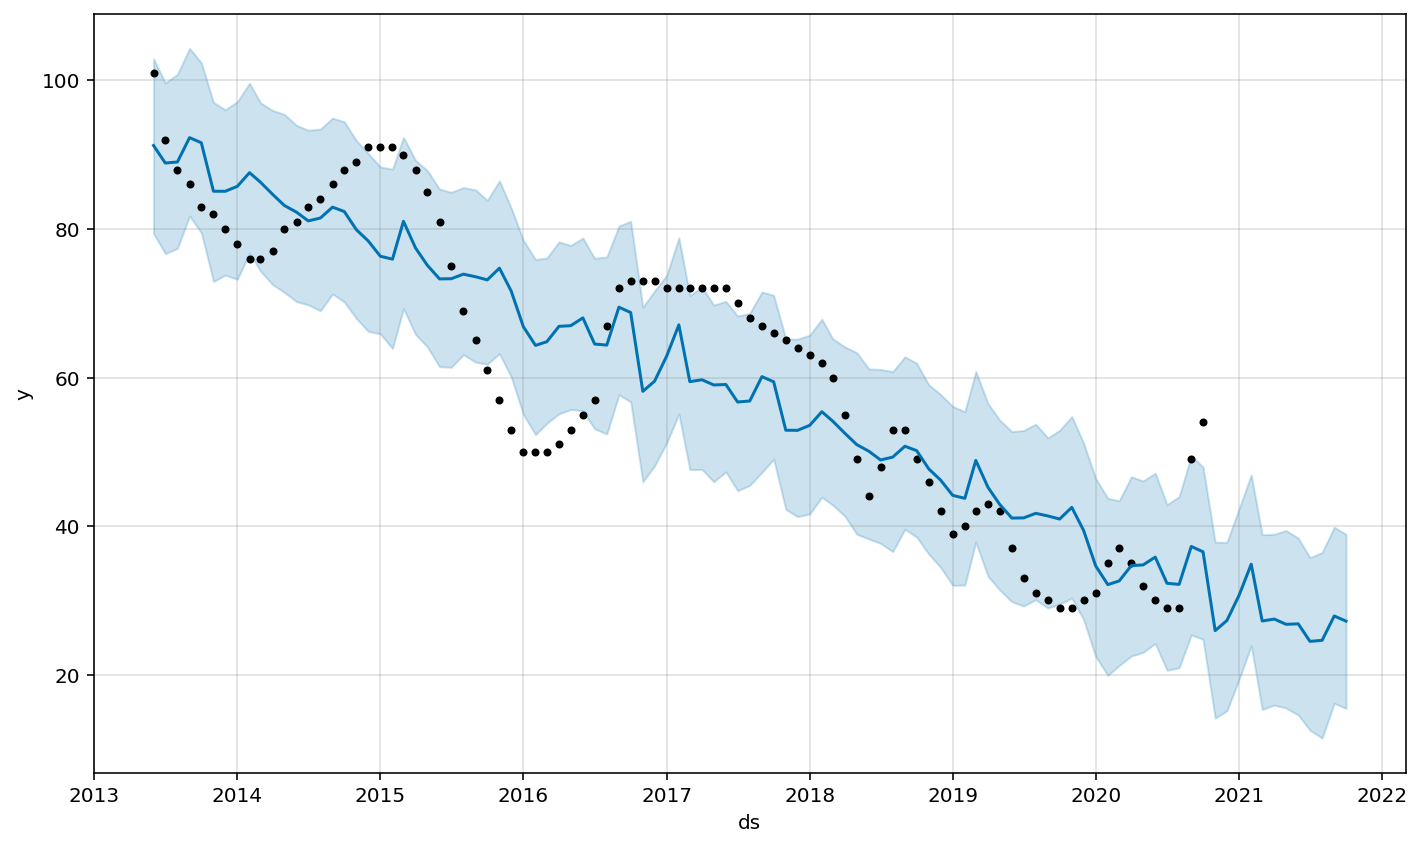

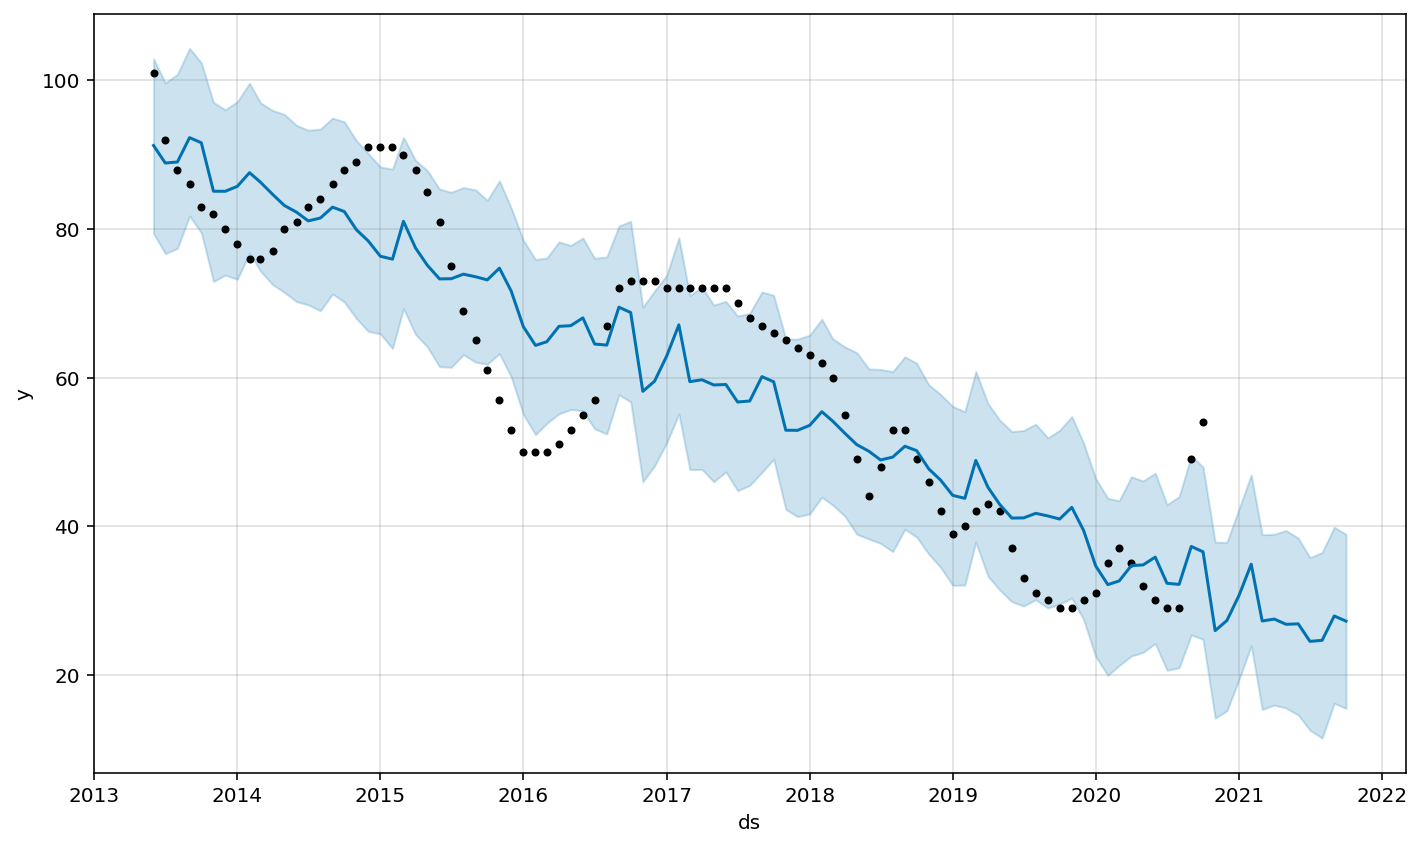

In [16]:
forecast_full = m.predict(full_range)
# print(forecast.shape)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast_full)

In [17]:
y_test = test_df.y
y_pred = forecast.yhat

In [18]:
def show_regression_result(y_test, y_pred, N=12):
    plt.rc('figure', figsize=(6,4))
    error = y_pred - y_test
    print("MAE=", np.abs(error).mean().round(4))
    print("max error=", max(error).round(4))
    #  잔차  (residue) 산포도
    print("R2=",r2_score(y_test, y_pred).round(4)) # R2
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.show()
    plt.scatter(y_test, error, s=5)
    plt.xlabel('y_test')
    plt.ylabel('error')
    plt.show()

MAE= 49.2978
max error= -33.0636
R2= -25.9955


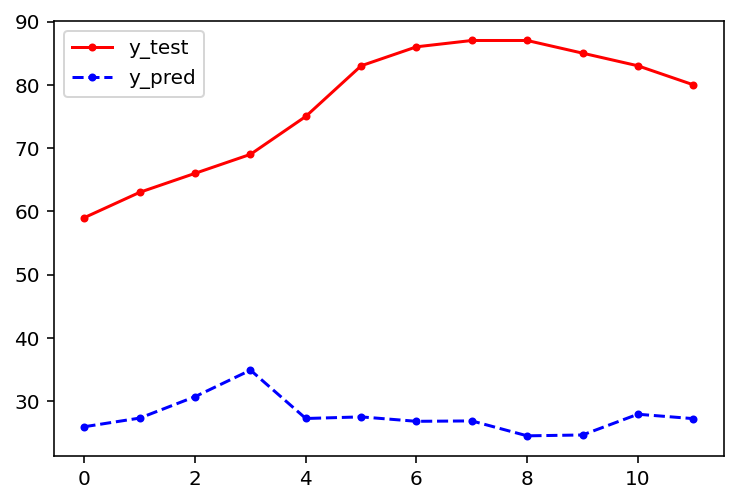

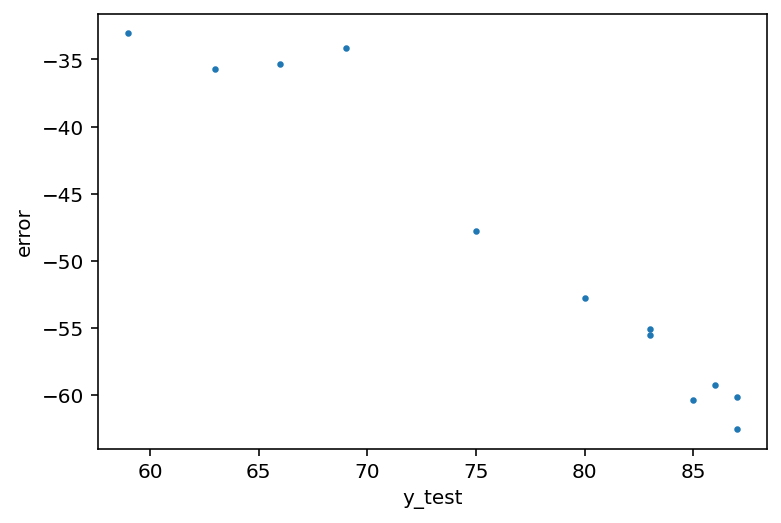

In [19]:
show_regression_result(y_test.values, y_pred.values) # 중요: 데이터프레임이나 시리즈의 내용(값)만 어레이로 바꾸려면 .values 사용

- 컴포넌트를 보려면 `Prophet.plot_components` 함수 사용
- 트렌드, 계절성, 휴일정보 등

In [ ]:
# 최근 1년의 동향 뿐 아니라, 학습기간 (9년)의 동향도 모두 같이 보려면 future 변수에 전 기간을 사용하면 된다

In [20]:
forecast.shape

(12, 16)

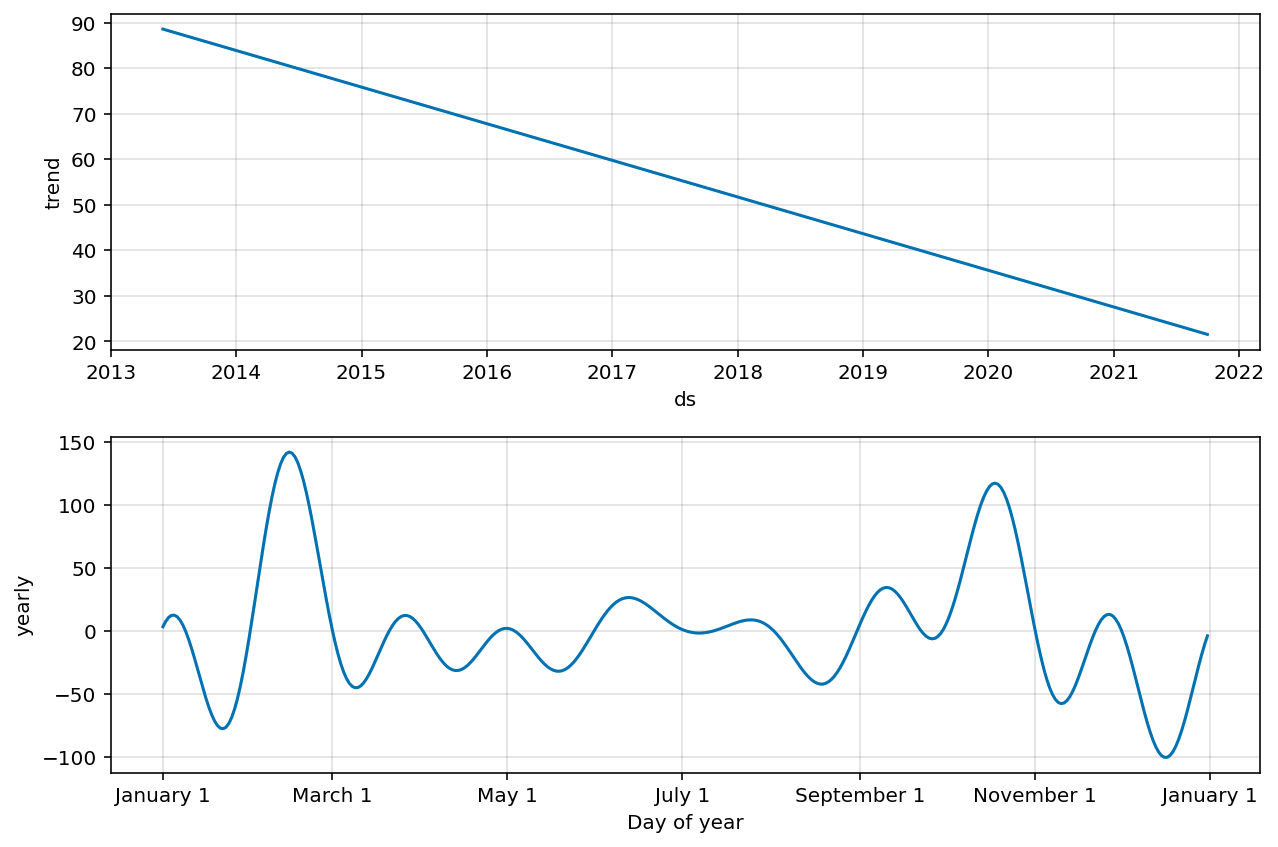

In [21]:
fig2 = m.plot_components(forecast_full)

## 적은 데이터 예측

In [22]:
path = 'https://raw.githubusercontent.com/StillWork/data/master/car_sales.csv'
df = pd.read_csv(path)
print(df.shape)
df

(108, 2)


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [ ]:
df32S.dropna()

,ds,y
0,2010-01-01,6.623
1,2010-02-01,5.973
2,2010-03-01,6.898
3,2010-04-01,7.017
4,2010-05-01,7.201
...,...,...
133,2021-02-01,5.269
134,2021-03-01,5.755
135,2021-04-01,5.626
136,2021-05-01,5.668


In [ ]:
df32S.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      138 non-null    datetime64[ns]
 1   y       138 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [ ]:
df32S.plot()
plt.show()

ValueError: ignored

In [ ]:
df32S.columns = ['ds', 'y']
df32S['ds']= pd.to_datetime(df['ds'])
df32S.info()

KeyError: ignored

In [ ]:
df[:3]

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026


## 학습

In [23]:
model = Prophet()
model.fit(df32S)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
df32S['ds'].min(), df32S['ds'].max(), 

(Timestamp('2013-06-01 00:00:00'), Timestamp('2021-10-01 00:00:00'))

## 향후 1년간 예측

In [25]:
future = model.make_future_dataframe(periods=12, freq='MS')
future

,ds
0,2013-06-01
1,2013-07-01
2,2013-08-01
3,2013-09-01
4,2013-10-01
...,...
108,2022-06-01
109,2022-07-01
110,2022-08-01
111,2022-09-01


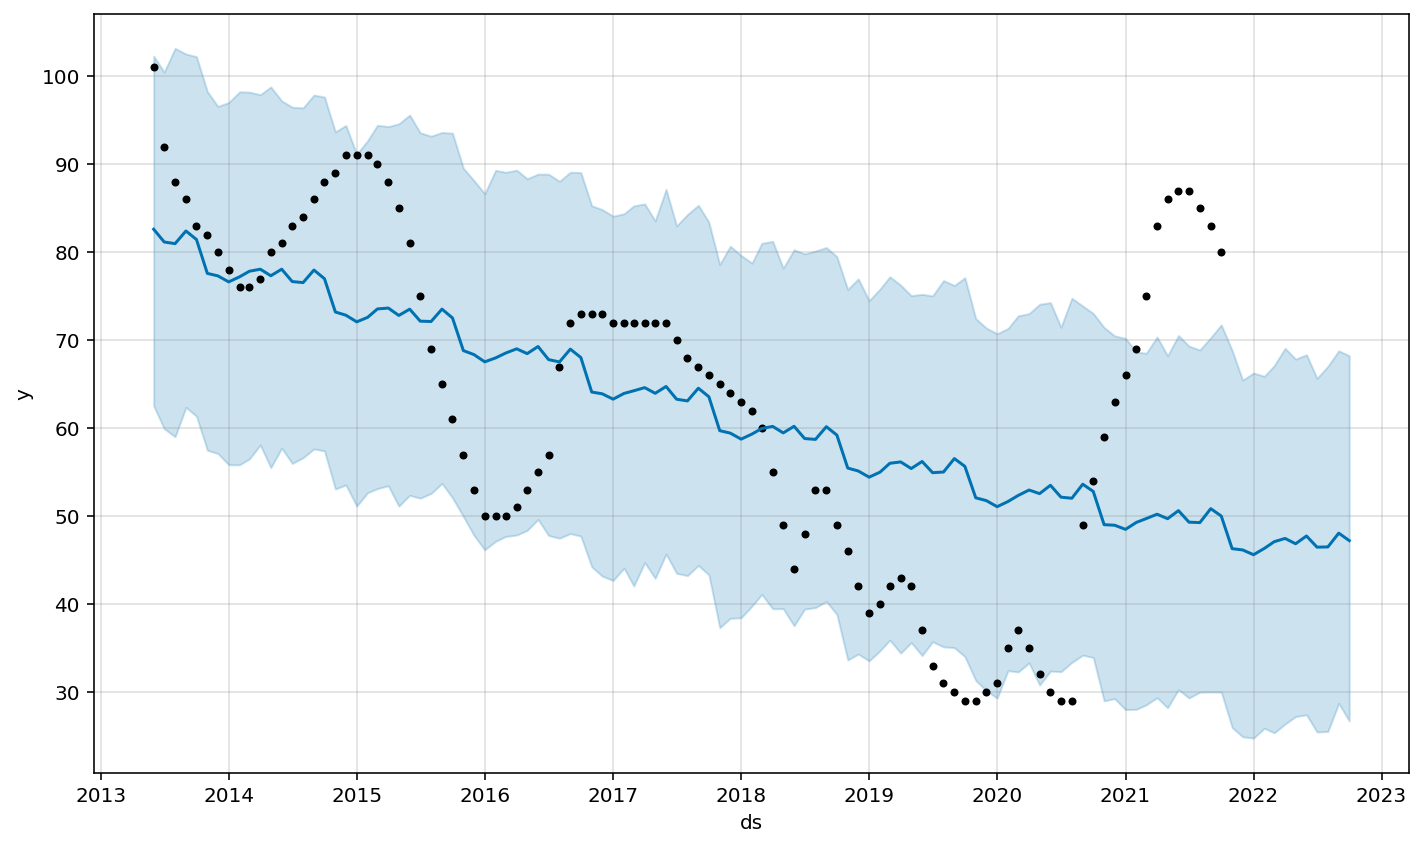

In [26]:
forecast = model.predict(future)
model.plot(forecast)
plt.show()

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-06-01,81.154165,62.530381,102.295914,81.154165,81.154165,1.457459,1.457459,1.457459,1.457459,1.457459,1.457459,0.0,0.0,0.0,82.611624
1,2013-07-01,80.787090,59.934773,100.475041,80.787090,80.787090,0.374318,0.374318,0.374318,0.374318,0.374318,0.374318,0.0,0.0,0.0,81.161408
2,2013-08-01,80.407778,59.014265,103.181158,80.407778,80.407778,0.563837,0.563837,0.563837,0.563837,0.563837,0.563837,0.0,0.0,0.0,80.971615
3,2013-09-01,80.028466,62.364188,102.537420,80.028466,80.028466,2.385111,2.385111,2.385111,2.385111,2.385111,2.385111,0.0,0.0,0.0,82.413577
4,2013-10-01,79.661391,61.347515,102.231842,79.661391,79.661391,1.781476,1.781476,1.781476,1.781476,1.781476,1.781476,0.0,0.0,0.0,81.442867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2022-06-01,46.358956,27.407843,68.346745,46.305811,46.417959,1.379799,1.379799,1.379799,1.379799,1.379799,1.379799,0.0,0.0,0.0,47.738755
109,2022-07-01,46.128398,25.449070,65.661196,46.061122,46.200661,0.339284,0.339284,0.339284,0.339284,0.339284,0.339284,0.0,0.0,0.0,46.467681
110,2022-08-01,45.890155,25.514173,67.031341,45.812640,45.977007,0.602992,0.602992,0.602992,0.602992,0.602992,0.602992,0.0,0.0,0.0,46.493147
111,2022-09-01,45.651912,28.702309,68.792724,45.561666,45.753521,2.408624,2.408624,2.408624,2.408624,2.408624,2.408624,0.0,0.0,0.0,48.060536


In [28]:
df32F = forecast[['ds','yhat']]
df32F[138:150]

,ds,yhat


In [ ]:
df32S[:-24]

,ds,y
0,2010-01-01,6.623
1,2010-02-01,5.973
2,2010-03-01,6.898
3,2010-04-01,7.017
4,2010-05-01,7.201
...,...,...
109,2019-02-01,6.667
110,2019-03-01,7.670
111,2019-04-01,7.643
112,2019-05-01,7.506


## 훈련과 검증
- 최종 1년 데이터를 test 데이터로 사용

In [29]:
train = df32S[:-12]
test = df32S[-12:]

In [30]:
future = test.drop("y", axis=1) 
future

,ds
130,2020-11-01
131,2020-12-01
132,2021-01-01
133,2021-02-01
134,2021-03-01
135,2021-04-01
136,2021-05-01
137,2021-06-01
138,2021-07-01
139,2021-08-01


In [31]:
model = Prophet()
model.fit(train)

forecast = model.predict(future)
y_pred = forecast['yhat'].values
y_test = test['y'].values

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


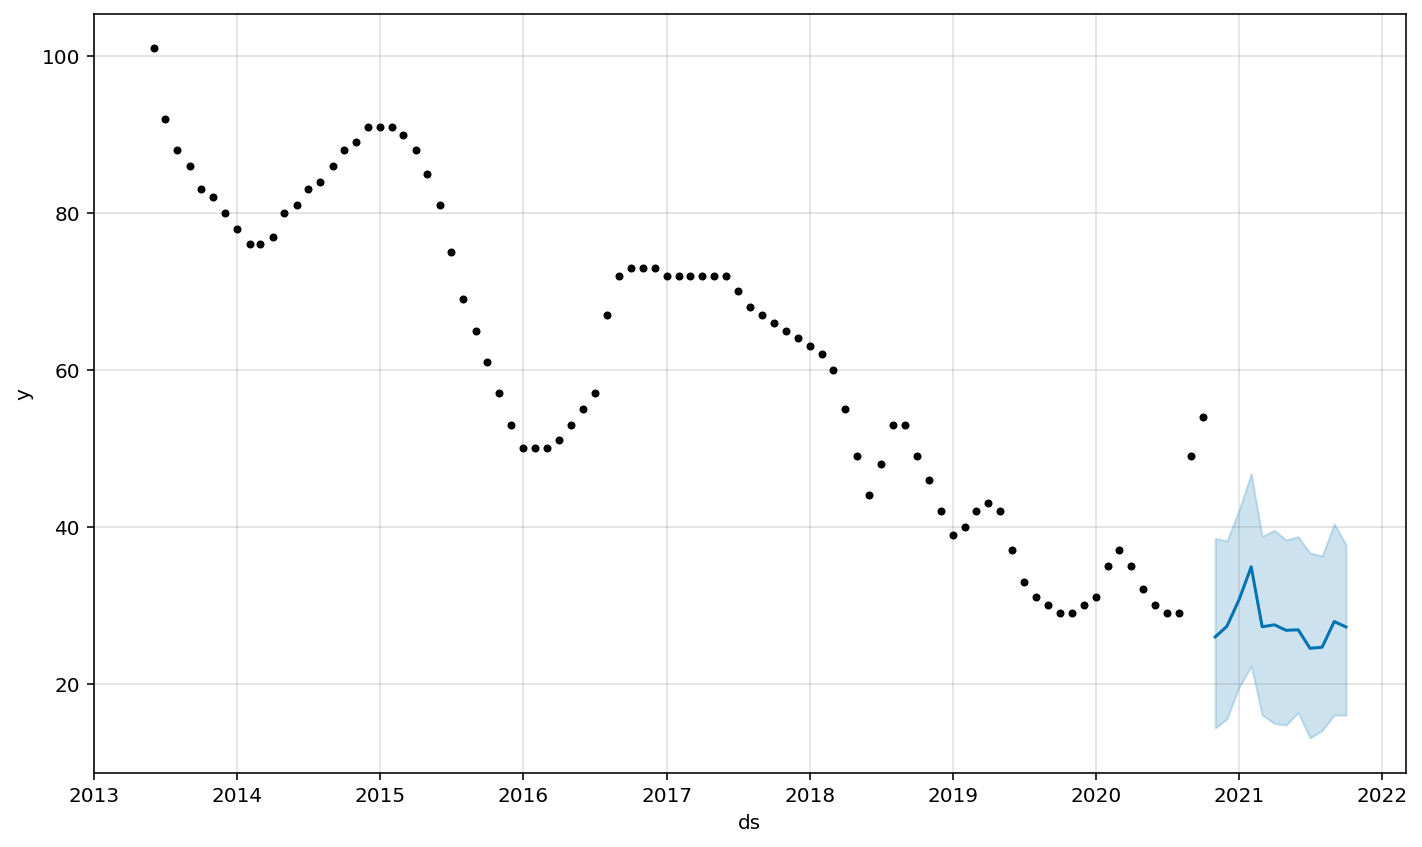

In [32]:
model.plot(forecast); plt.show()

MAE= 49.2978
max error= -33.0636
R2= -25.9955


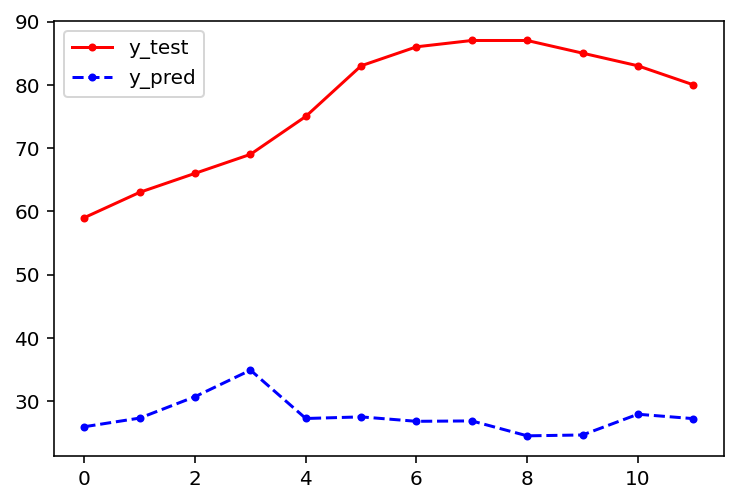

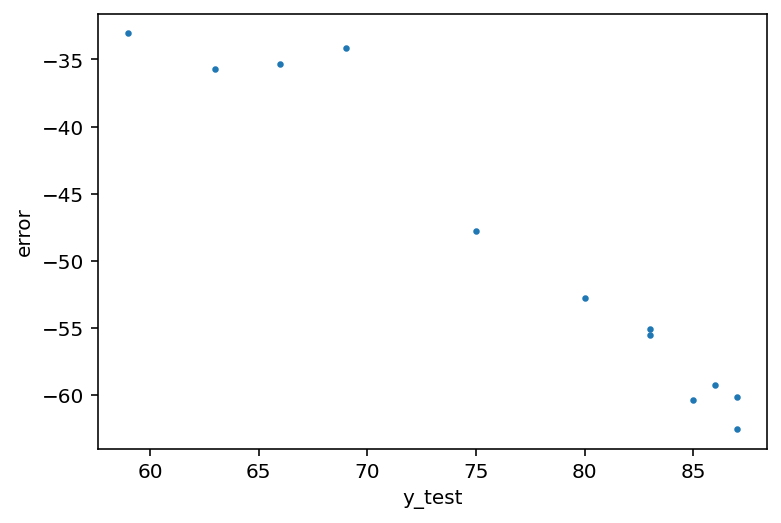

In [33]:
show_regression_result(y_test, y_pred, 100)

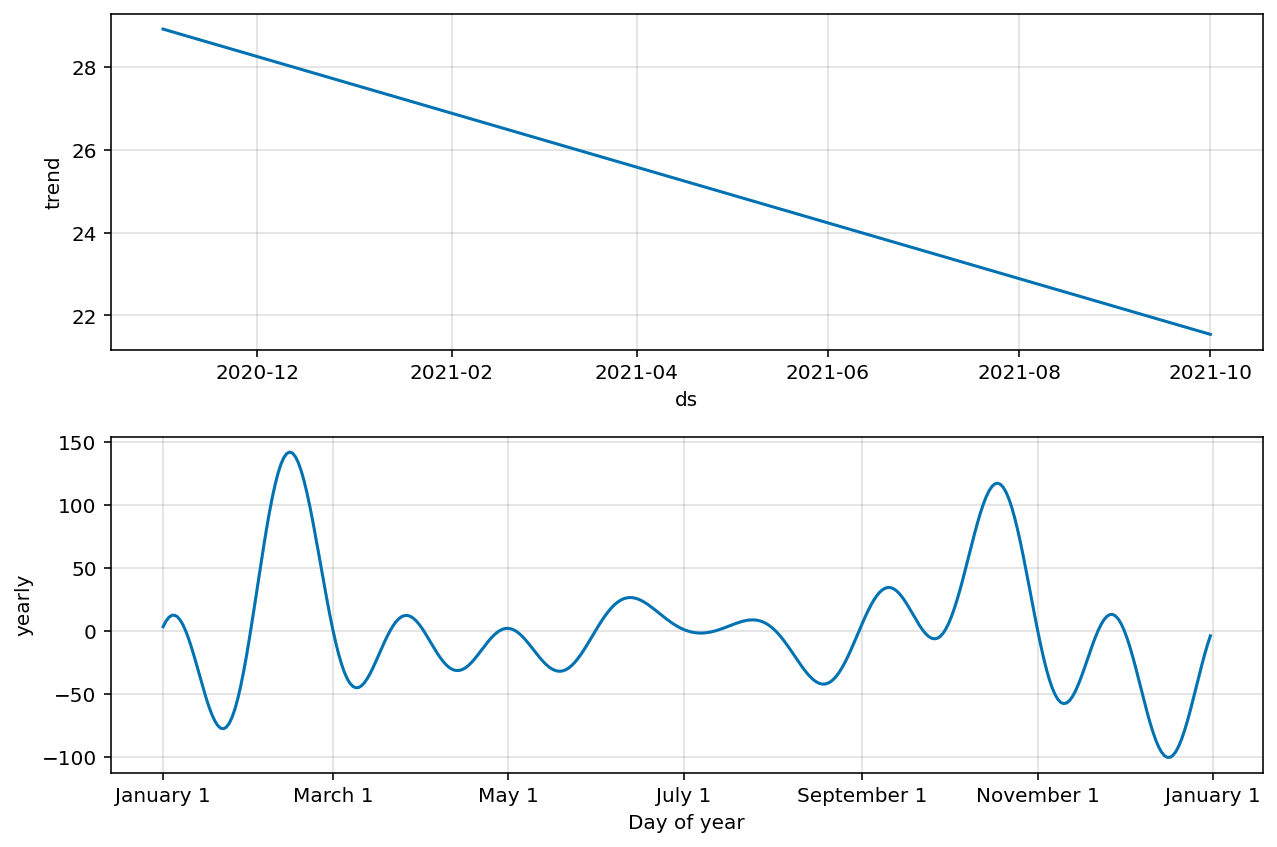

In [34]:
fig2 = model.plot_components(forecast)

In [ ]:
# 과제: 위에서는 과거 1년 데이터를 예측하는 것을 검증했다. (9년치: 8년치 학습, 1년치로 검증)
# 과거 2년치를 예측하는 모델로 바꾸어 본다 (7년치로 학습, 2년치로 검증)

# 선형 또는 naive 모델

In [35]:
def naive_model(x_seq):
    return np.array(x_seq).mean(axis=1)

In [36]:
def split_seq(sequence, n_steps):
    x, y = [], []
    for i in range(len(sequence)):
        if i > len(sequence) - n_steps - 1 : break
        x.append(sequence[i:i+n_steps])
        y.append(sequence[i+n_steps])
    return np.array(x), np.array(y)

In [37]:
def split_seq_2(sequence, n_steps_in, n_steps_out=1):
  x, y = [],[]
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    if out_end_ix > len(sequence):
        break
    seq_x, seq_y = sequence[i:end_ix], sequence[out_end_ix-1]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x), np.array(y)

In [49]:
df32S

,ds,y
41,2013-06-01,101.0
42,2013-07-01,92.0
43,2013-08-01,88.0
44,2013-09-01,86.0
45,2013-10-01,83.0
...,...,...
137,2021-06-01,87.0
138,2021-07-01,87.0
139,2021-08-01,85.0
140,2021-09-01,83.0


In [46]:
from sklearn.linear_model import LinearRegression
y = df32S.y.values
cut = np.int((len(y)*0.7))
train = y[:cut]
test = y[cut:]
y.shape, train.shape, test.shape, cut

((101,), (70,), (31,), 70)

In [50]:
lr= LinearRegression()
for n_steps in range(1,10):
  x_train, y_train = split_seq(train, n_steps)
  x_test, y_test = split_seq(test, n_steps)
  lr.fit(x_train, y_train) 
  print(n_steps, lr.score(x_test, y_test).round(3))

1 0.95
2 0.963
3 0.958
4 0.955
5 0.954
6 0.952
7 0.95
8 0.941
9 0.941


MAE= 3.1667
max error= 5.0
R2= 0.9532


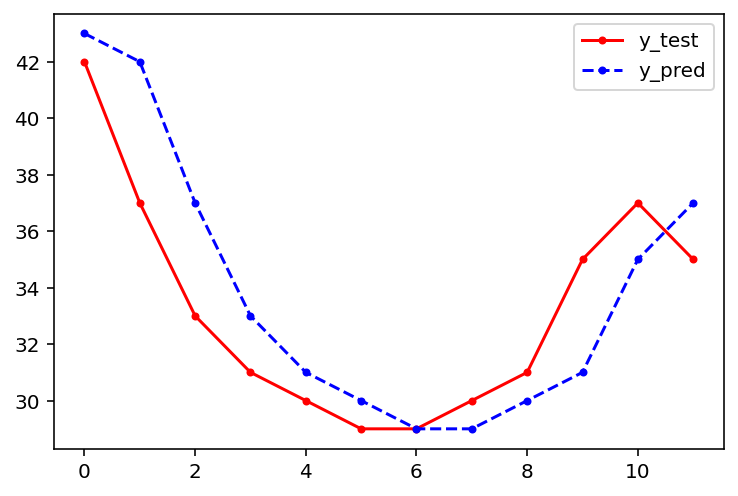

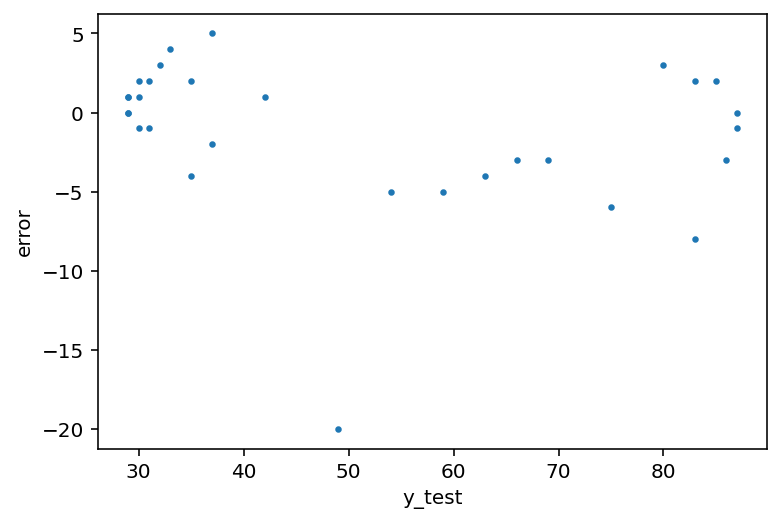

In [51]:
n_steps_in = 1
n_steps_out = 1
x_train, y_train = split_seq_2(train, n_steps_in, n_steps_out)
x_test, y_test = split_seq_2(test, n_steps_in, n_steps_out)
#lr.fit(x_train, y_train) 
y_pred = naive_model(x_test)
show_regression_result(y_test, y_pred)

# Prophet 모델 장점 
# 적은 데이터도 잘 분석
# 결측치가 있어도 동작한다